In [1]:
from yahoo_fin.stock_info import get_data, tickers_sp500, tickers_nasdaq, tickers_other, get_quote_table
import matplotlib.pylab as plt

In [2]:
sp500 = tickers_sp500()
print(sp500)

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BR', 'BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTLT', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'D

In [3]:
import pickle
sp500Dict = {}
'''
It takes a while to get quote tables for alls sp500 stocks.
Once it is loaded, I will save a copy for the future usage.
'''
try:
    sp500Dict = pickle.load(open("sp500.p", "rb"))
except:
    for ticker in sp500:
        try:
            sp500Dict[ticker] = get_quote_table(ticker)
            print(ticker + " is added.")
        except:
            print(ticker + " is skipped for some reason")
pickle.dump(sp500Dict, open("sp500.p", "wb"))
#print(sp500Dict)

A is added.
AAL is added.
AAP is added.
AAPL is added.
ABBV is added.
ABC is added.
ABMD is added.
ABT is added.
ACN is added.
ADBE is added.
ADI is added.
ADM is added.
ADP is added.
ADSK is added.
AEE is added.
AEP is added.
AES is added.
AFL is added.
AIG is added.
AIZ is added.
AJG is added.
AKAM is added.
ALB is added.
ALGN is added.
ALK is added.
ALL is added.
ALLE is added.
ALXN is added.
AMAT is added.
AMCR is added.
AMD is added.
AME is added.
AMGN is added.
AMP is added.
AMT is added.
AMZN is added.
ANET is added.
ANSS is added.
ANTM is added.
AON is added.
AOS is added.
APA is added.
APD is added.
APH is added.
APTV is added.
ARE is added.
ATO is added.
ATVI is added.
AVB is added.
AVGO is added.
AVY is added.
AWK is added.
AXP is added.
AZO is added.
BA is added.
BAC is added.
BAX is added.
BBY is added.
BDX is added.
BEN is added.
BF.B is skipped for some reason
BIIB is added.
BIO is added.
BK is added.
BKNG is added.
BKR is added.
BLK is added.
BLL is added.
BMY is added.

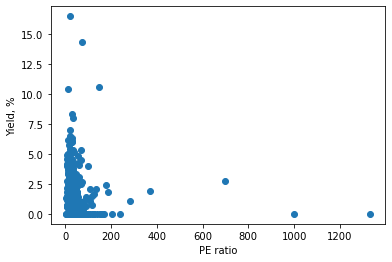

In [4]:
'''
Plot the data as a QC
'''
import numpy as np
x = np.zeros(len(sp500Dict)) # PE ratio
y = np.zeros(len(sp500Dict)) # return
index = 0
for stock in sp500Dict.keys():
    peRatio = sp500Dict[stock]['PE Ratio (TTM)']
    try:
        peRatio = float(peRatio)
    except:
        peRatio = 0
    divYield = sp500Dict[stock]['Forward Dividend & Yield']
    try:
        divYield = float(divYield.split(" ")[0])
    except:
        divYield = 0
    x[index] = peRatio
    y[index] = divYield
    index = index + 1
plt.plot(x,y, 'o')
plt.xlabel("PE ratio")
plt.ylabel("Yield, %")
plt.show()